In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
kd=pd.read_csv(r'C:\Users\hindo\Downloads\kidney_disease.csv')
kd.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [3]:
kd.shape

(400, 26)

In [4]:
kd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [5]:
kd.describe()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [6]:
kd.isna().sum()

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [7]:
pn=kd.isna().sum()/len(kd)*100
pn

id                 0.00
age                2.25
bp                 3.00
sg                11.75
al                11.50
su                12.25
rbc               38.00
pc                16.25
pcc                1.00
ba                 1.00
bgr               11.00
bu                 4.75
sc                 4.25
sod               21.75
pot               22.00
hemo              13.00
pcv               17.50
wc                26.25
rc                32.50
htn                0.50
dm                 0.50
cad                0.50
appet              0.25
pe                 0.25
ane                0.25
classification     0.00
dtype: float64

In [8]:
cols=pn[pn>25].index
cols

Index(['rbc', 'wc', 'rc'], dtype='object')

In [9]:
kd.drop(cols,axis=1,inplace=True)

In [10]:
kd.shape

(400, 23)

In [11]:
kd.isna().sum()

id                 0
age                9
bp                12
sg                47
al                46
su                49
pc                65
pcc                4
ba                 4
bgr               44
bu                19
sc                17
sod               87
pot               88
hemo              52
pcv               70
htn                2
dm                 2
cad                2
appet              1
pe                 1
ane                1
classification     0
dtype: int64

In [12]:
num_list=[]
for i in kd:
    if kd[i].dtype!=object:
        num_list.append(i)

In [13]:
num_list

['id', 'age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo']

In [18]:
def null(col):
    return kd[col].fillna(kd[col].mean(),inplace=True)

In [19]:
for i in num_list:
    null(i)

In [20]:
kd.isna().sum()

id                 0
age                0
bp                 0
sg                 0
al                 0
su                 0
pc                65
pcc                4
ba                 4
bgr                0
bu                 0
sc                 0
sod                0
pot                0
hemo               0
pcv               70
htn                2
dm                 2
cad                2
appet              1
pe                 1
ane                1
classification     0
dtype: int64

In [21]:
obj_list=[]
for i in kd:
    if kd[i].dtype==object:
        obj_list.append(i)

In [22]:
obj_list

['pc',
 'pcc',
 'ba',
 'pcv',
 'htn',
 'dm',
 'cad',
 'appet',
 'pe',
 'ane',
 'classification']

In [23]:
def cat_null(col):
    return kd[col].fillna(kd[col].mode()[0],inplace=True)

In [24]:
for i in obj_list:
    cat_null(i)

In [25]:
kd.isna().sum()

id                0
age               0
bp                0
sg                0
al                0
su                0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

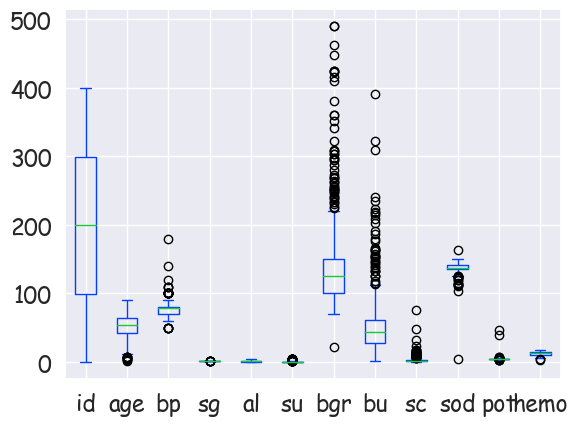

In [32]:
sns.set_theme(context='notebook',style='darkgrid',font='cursive',palette='bright',font_scale=1.5)
kd.plot(kind='box')
plt.show()

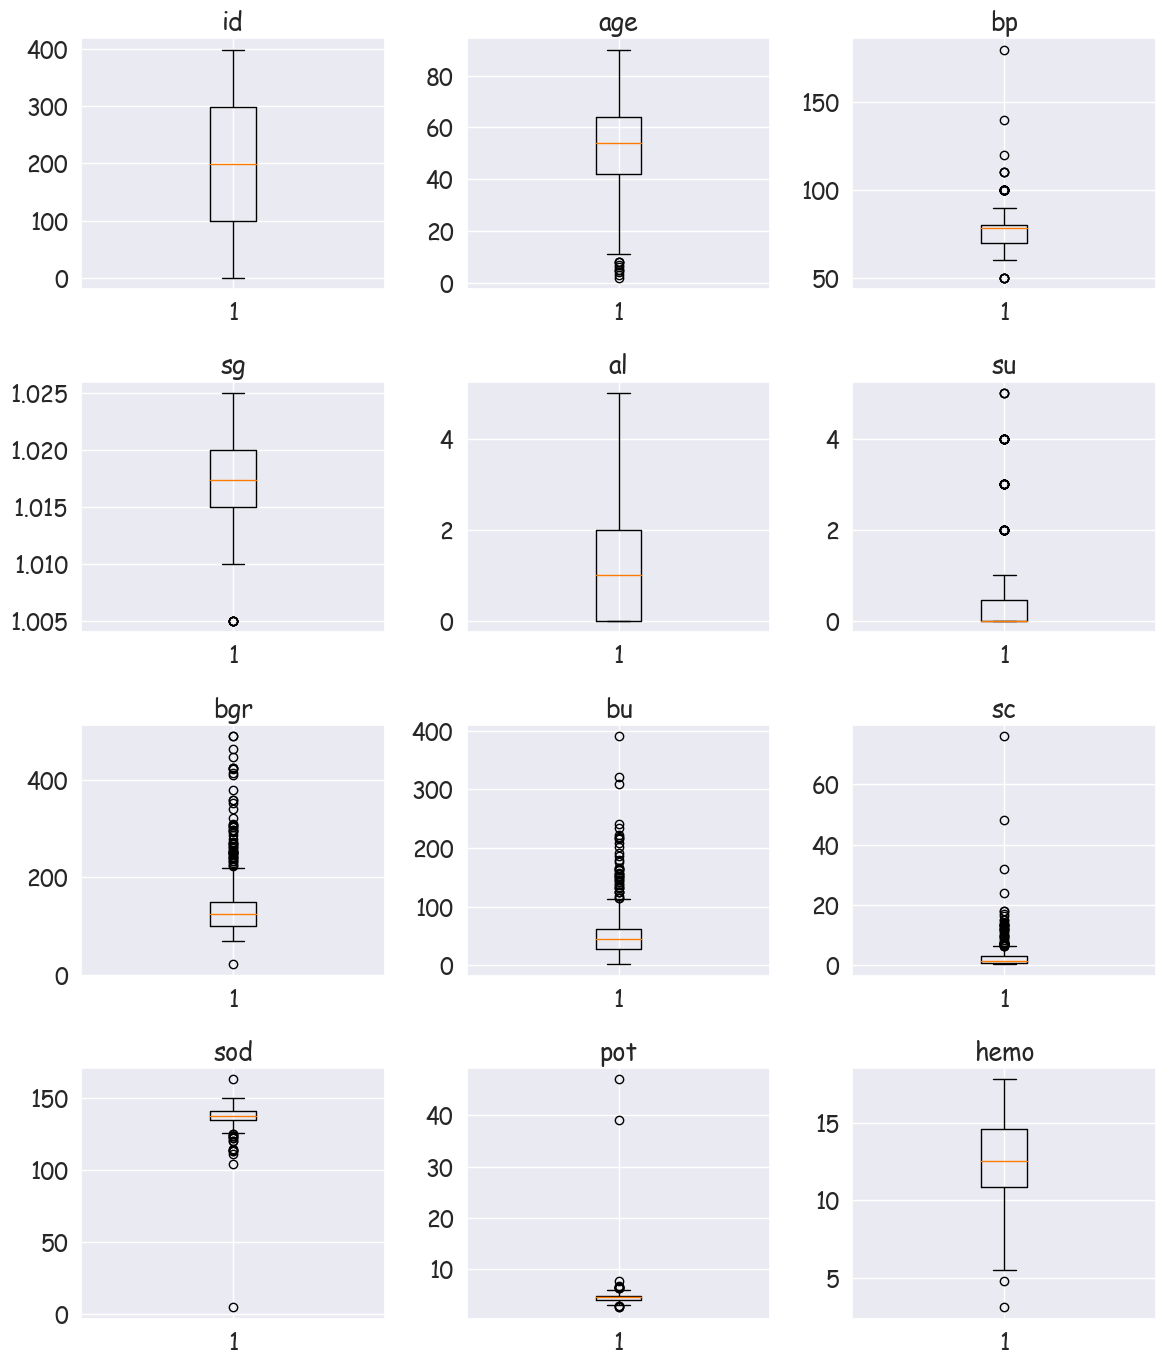

In [34]:
plt.figure(figsize=(12,14),dpi=100)
for i,j in enumerate(num_list):
    plt.subplot(4,3,i+1)
    plt.boxplot(kd[j])
    plt.title(j)
    plt.tight_layout()

In [35]:
def cap_outlier(col):
    q3=kd[col].quantile(0.75)
    q1=kd[col].quantile(0.25)
    iqr=q3-q1
    upper=q3+1.5*iqr
    lower=q1-1.5*iqr
    kd[col].clip(lower,upper,inplace=True)

In [36]:
for i in num_list:
    cap_outlier(i)

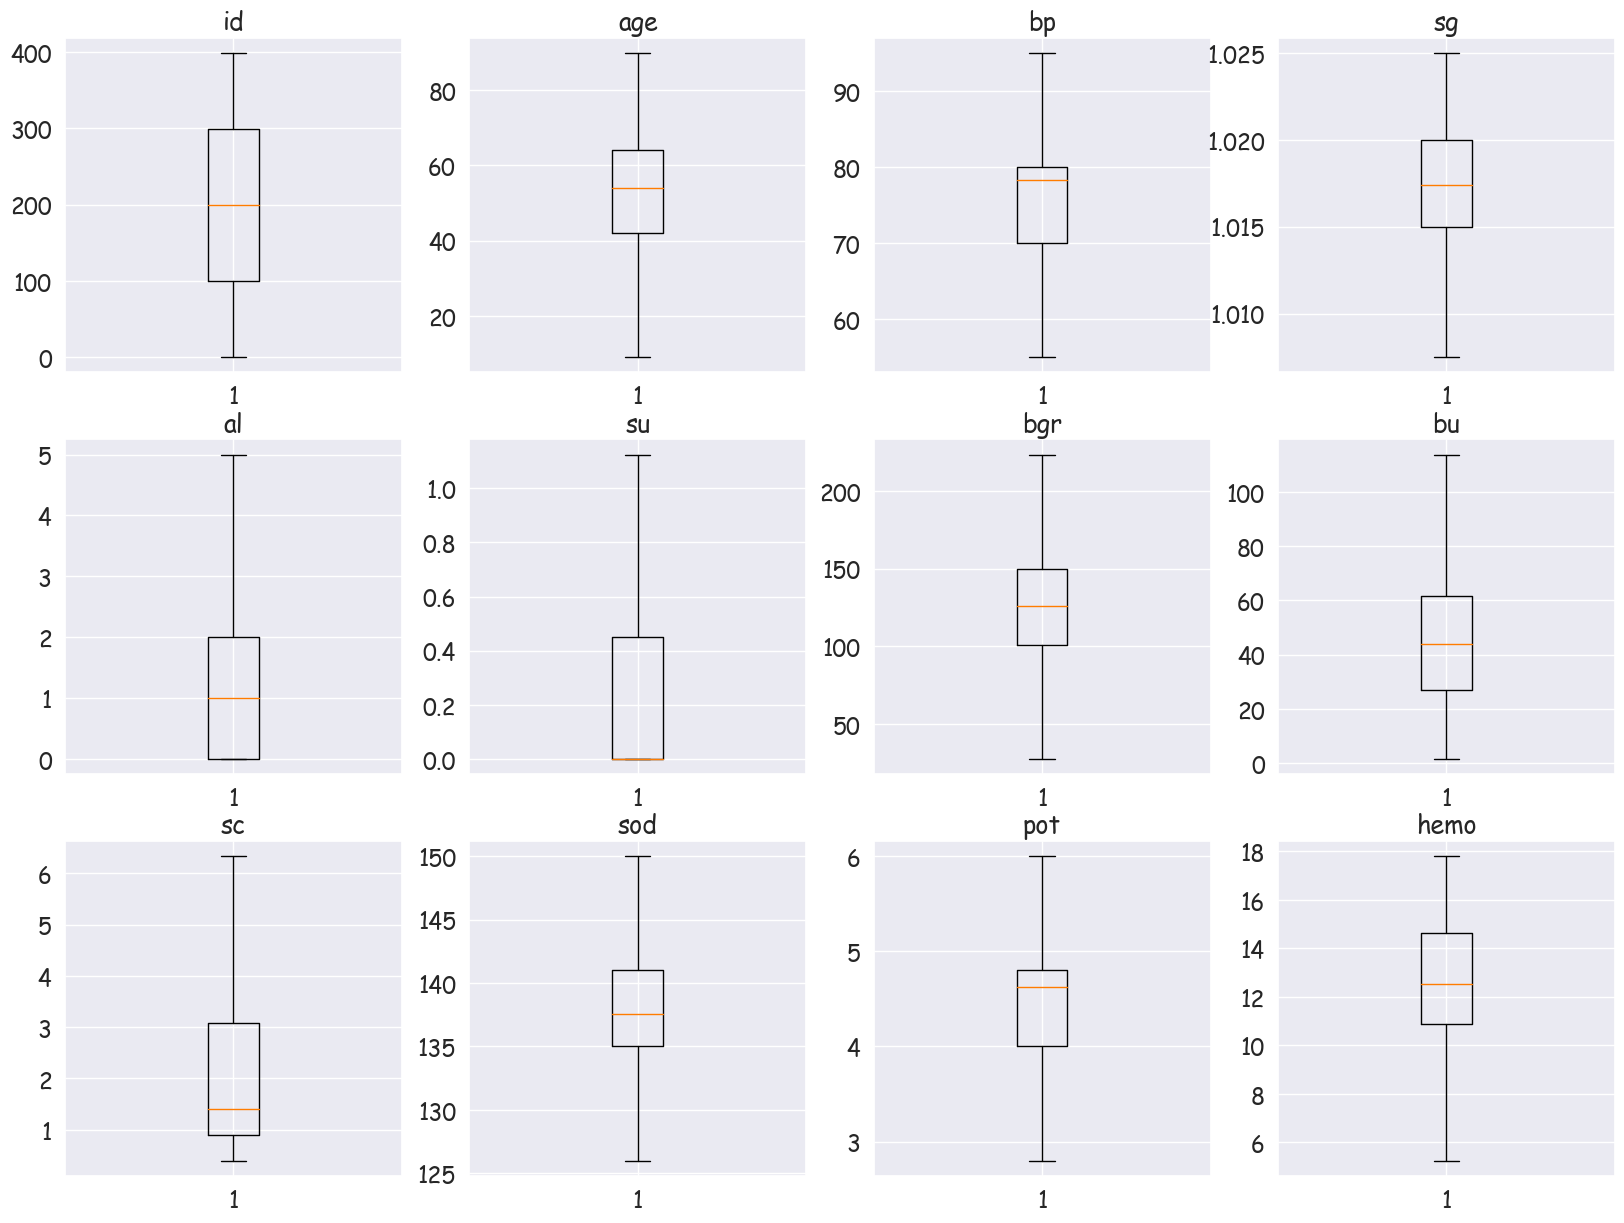

In [49]:
plt.figure(figsize=(20,20),dpi=100)
for i,j in enumerate(num_list):
    plt.subplot(4,4,i+1)
    plt.boxplot(kd[j])
    plt.title(j)
    plt.tight_layout

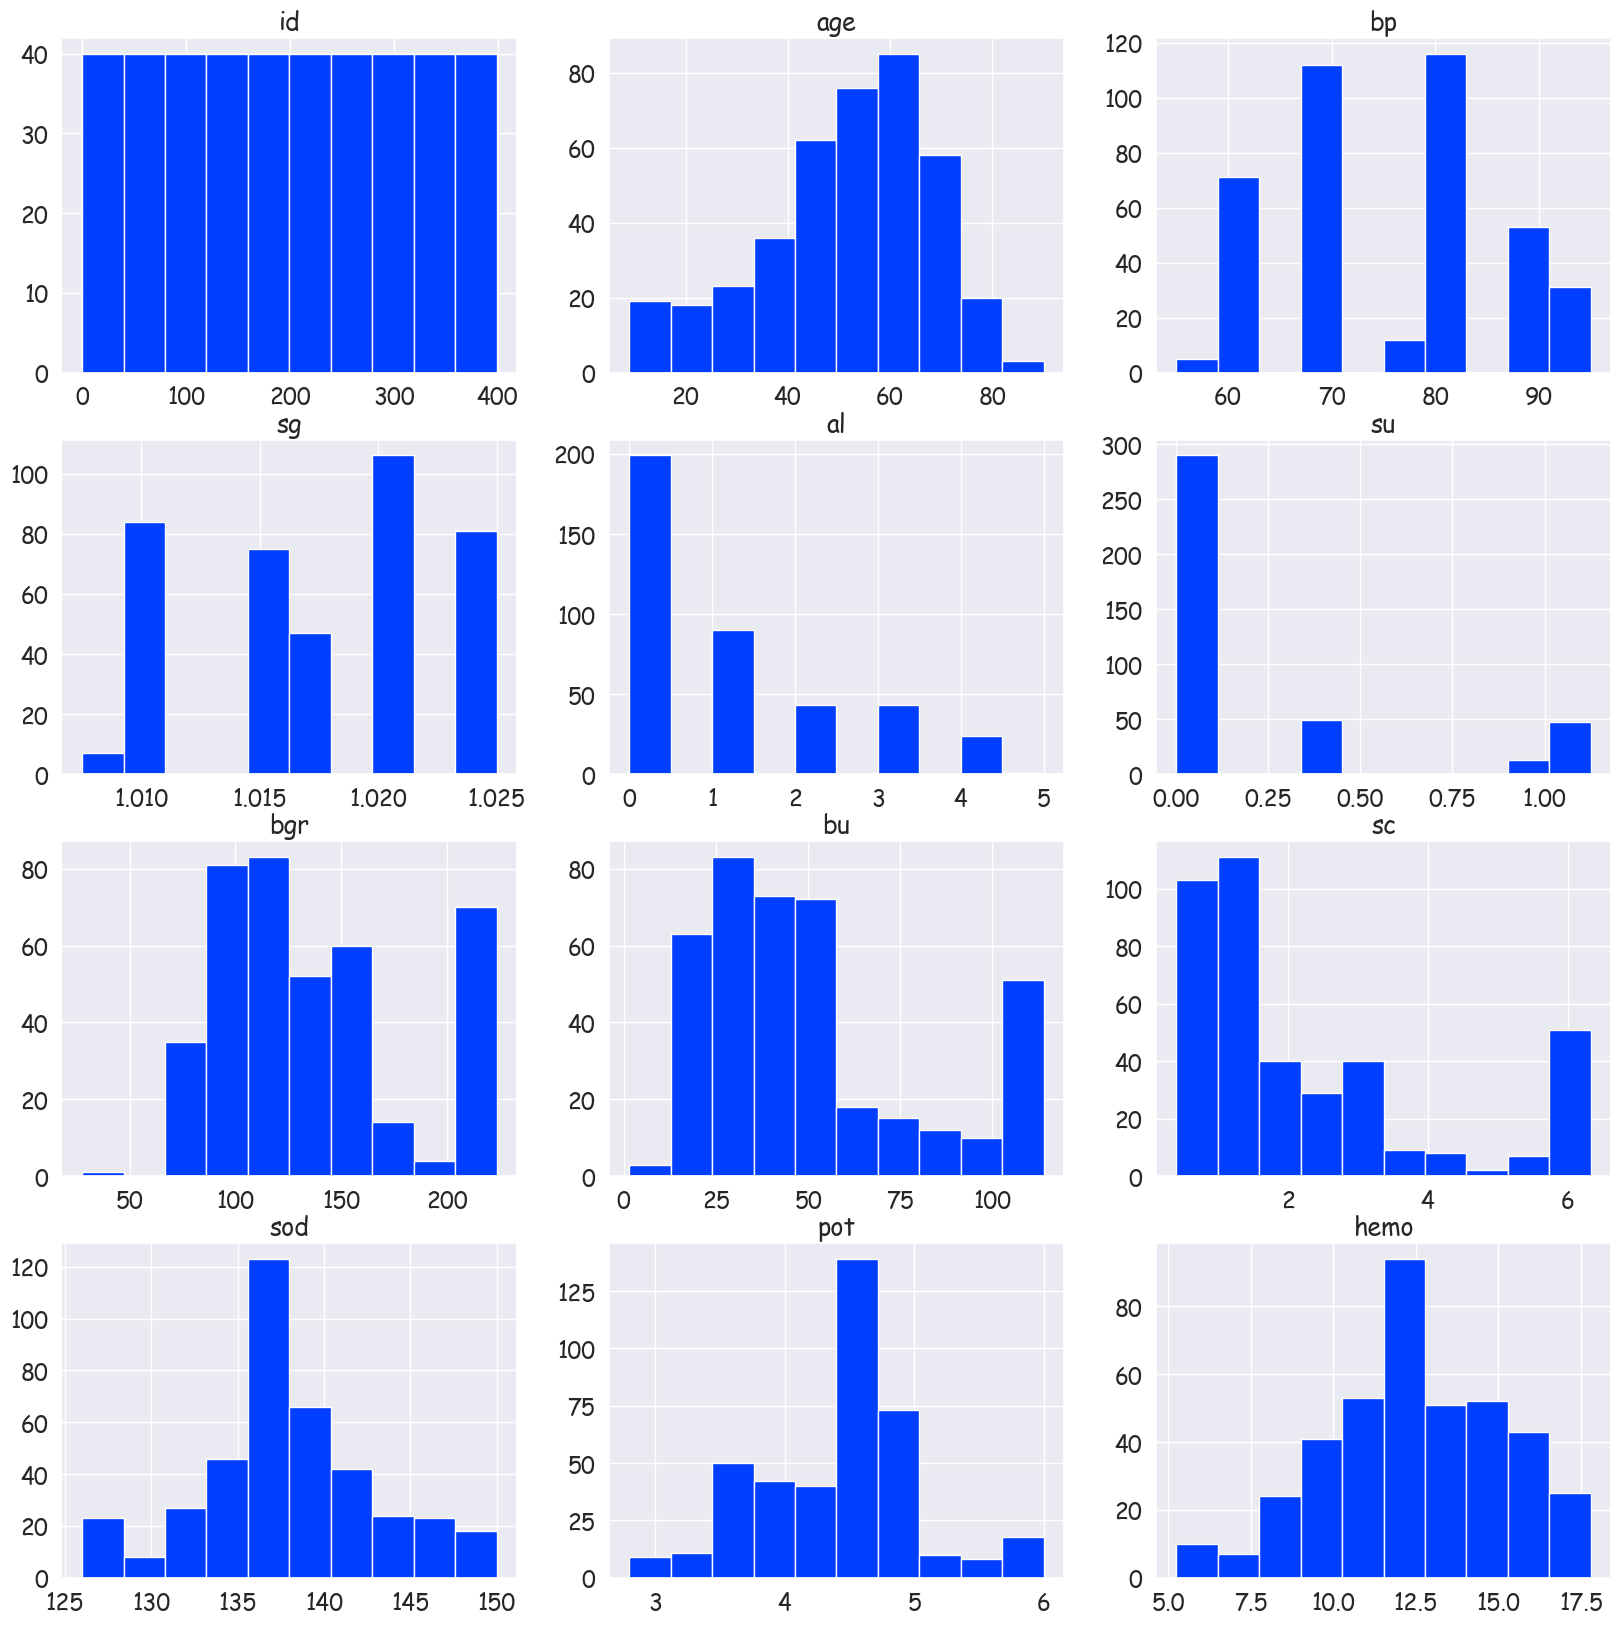

In [52]:
plt.figure(figsize=(20,20),dpi=100)
for i,j in enumerate(num_list):
    plt.subplot(4,3,i+1)
    plt.hist(kd[j])
    plt.title(j)
    plt.tight_layout

In [55]:
s=kd.nunique()

In [65]:
cat_col=s[s<8].index
cat_col

Index(['bp', 'sg', 'al', 'su', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet',
       'pe', 'ane', 'classification'],
      dtype='object')

In [66]:
obj_list

['pc',
 'pcc',
 'ba',
 'pcv',
 'htn',
 'dm',
 'cad',
 'appet',
 'pe',
 'ane',
 'classification']

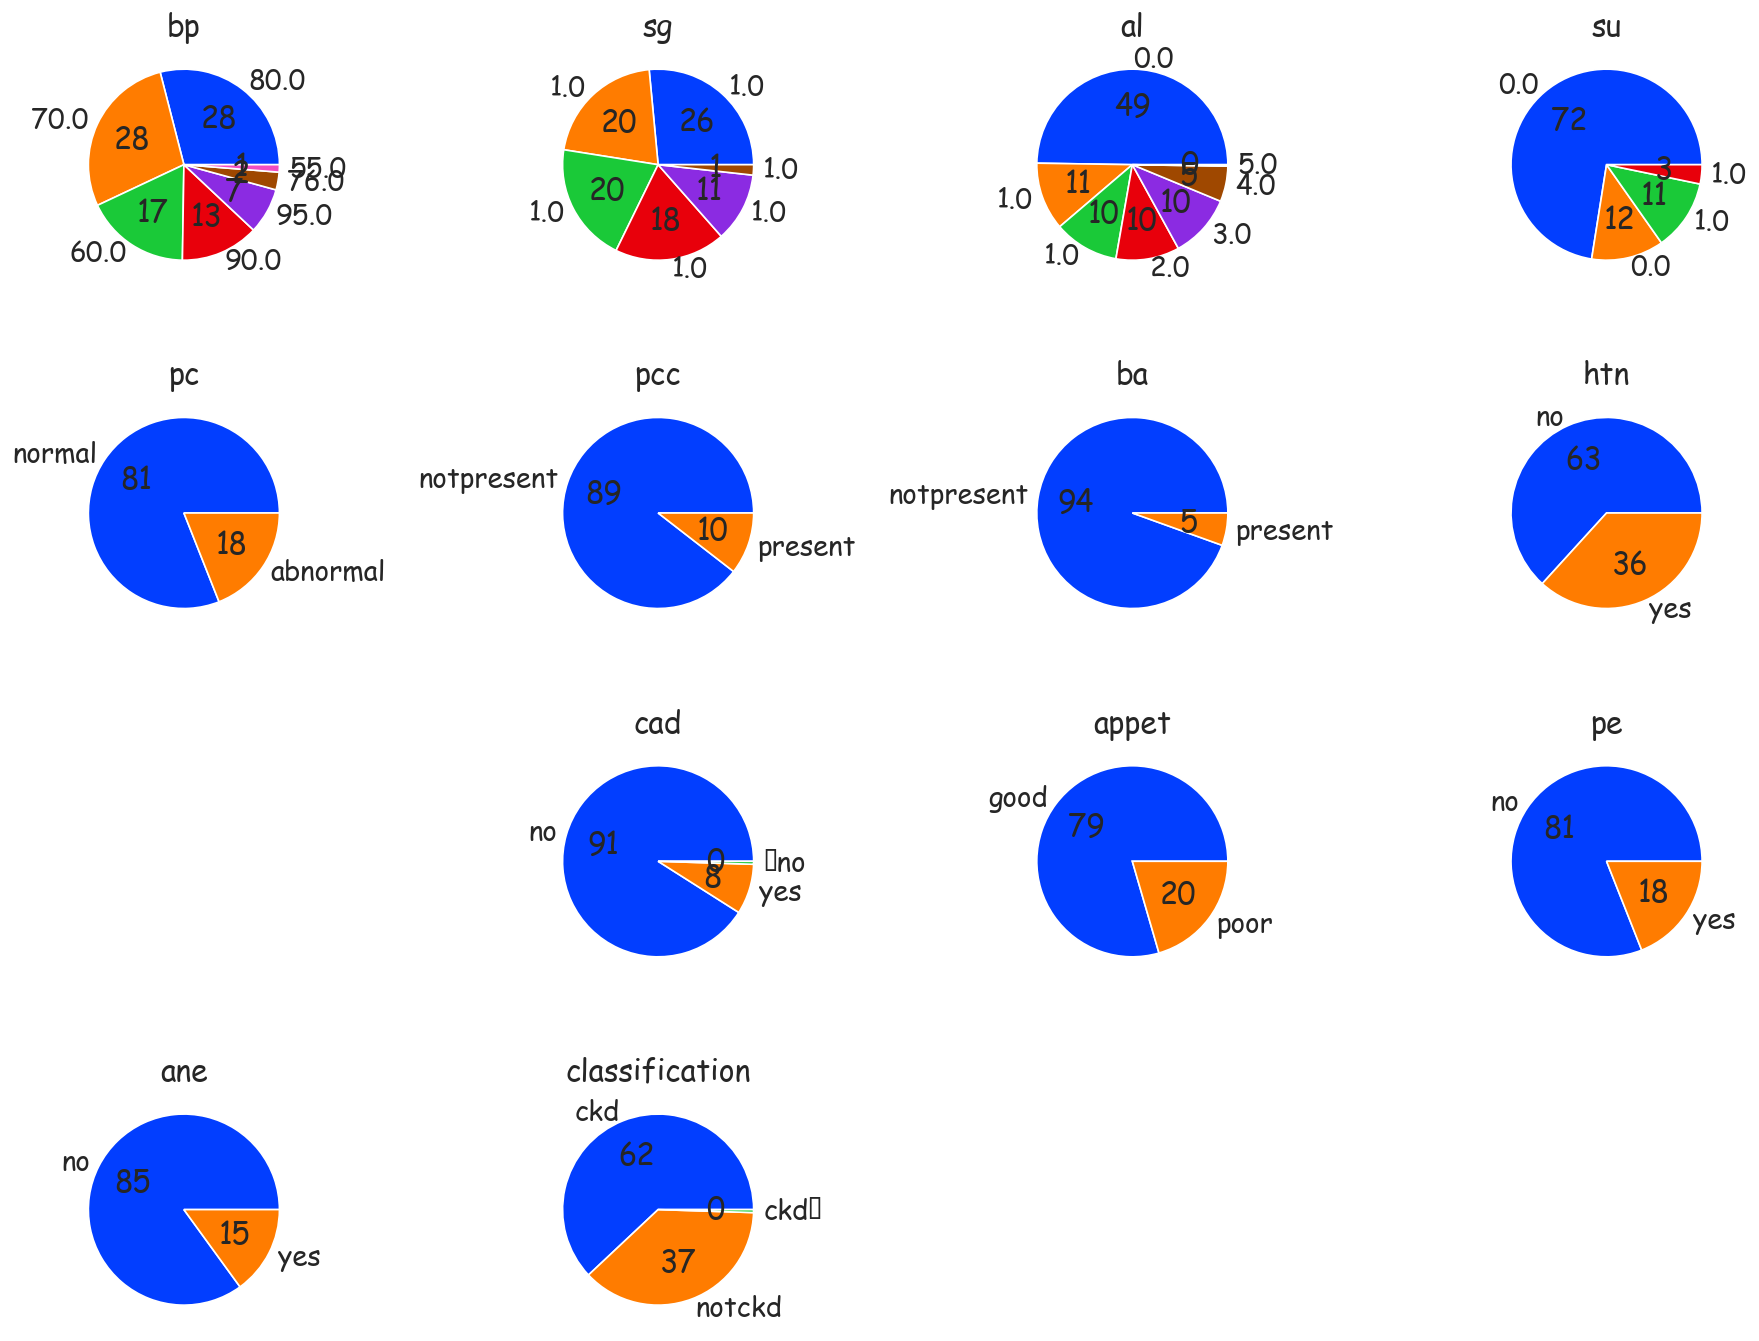

In [69]:
plt.figure(figsize=(15,12),dpi=120)

for i,j in enumerate(cat_col):

    plt.subplot(4,4,i+1)
    
    x=kd[j].value_counts().index
    
    if x.dtype==float:
        plt.pie(kd[j].value_counts(),labels=np.round(np.array(x)),autopct='%d')
    else:
        plt.pie(kd[j].value_counts(),labels=x,autopct='%d')
    plt.title(j)
        
    plt.tight_layout()

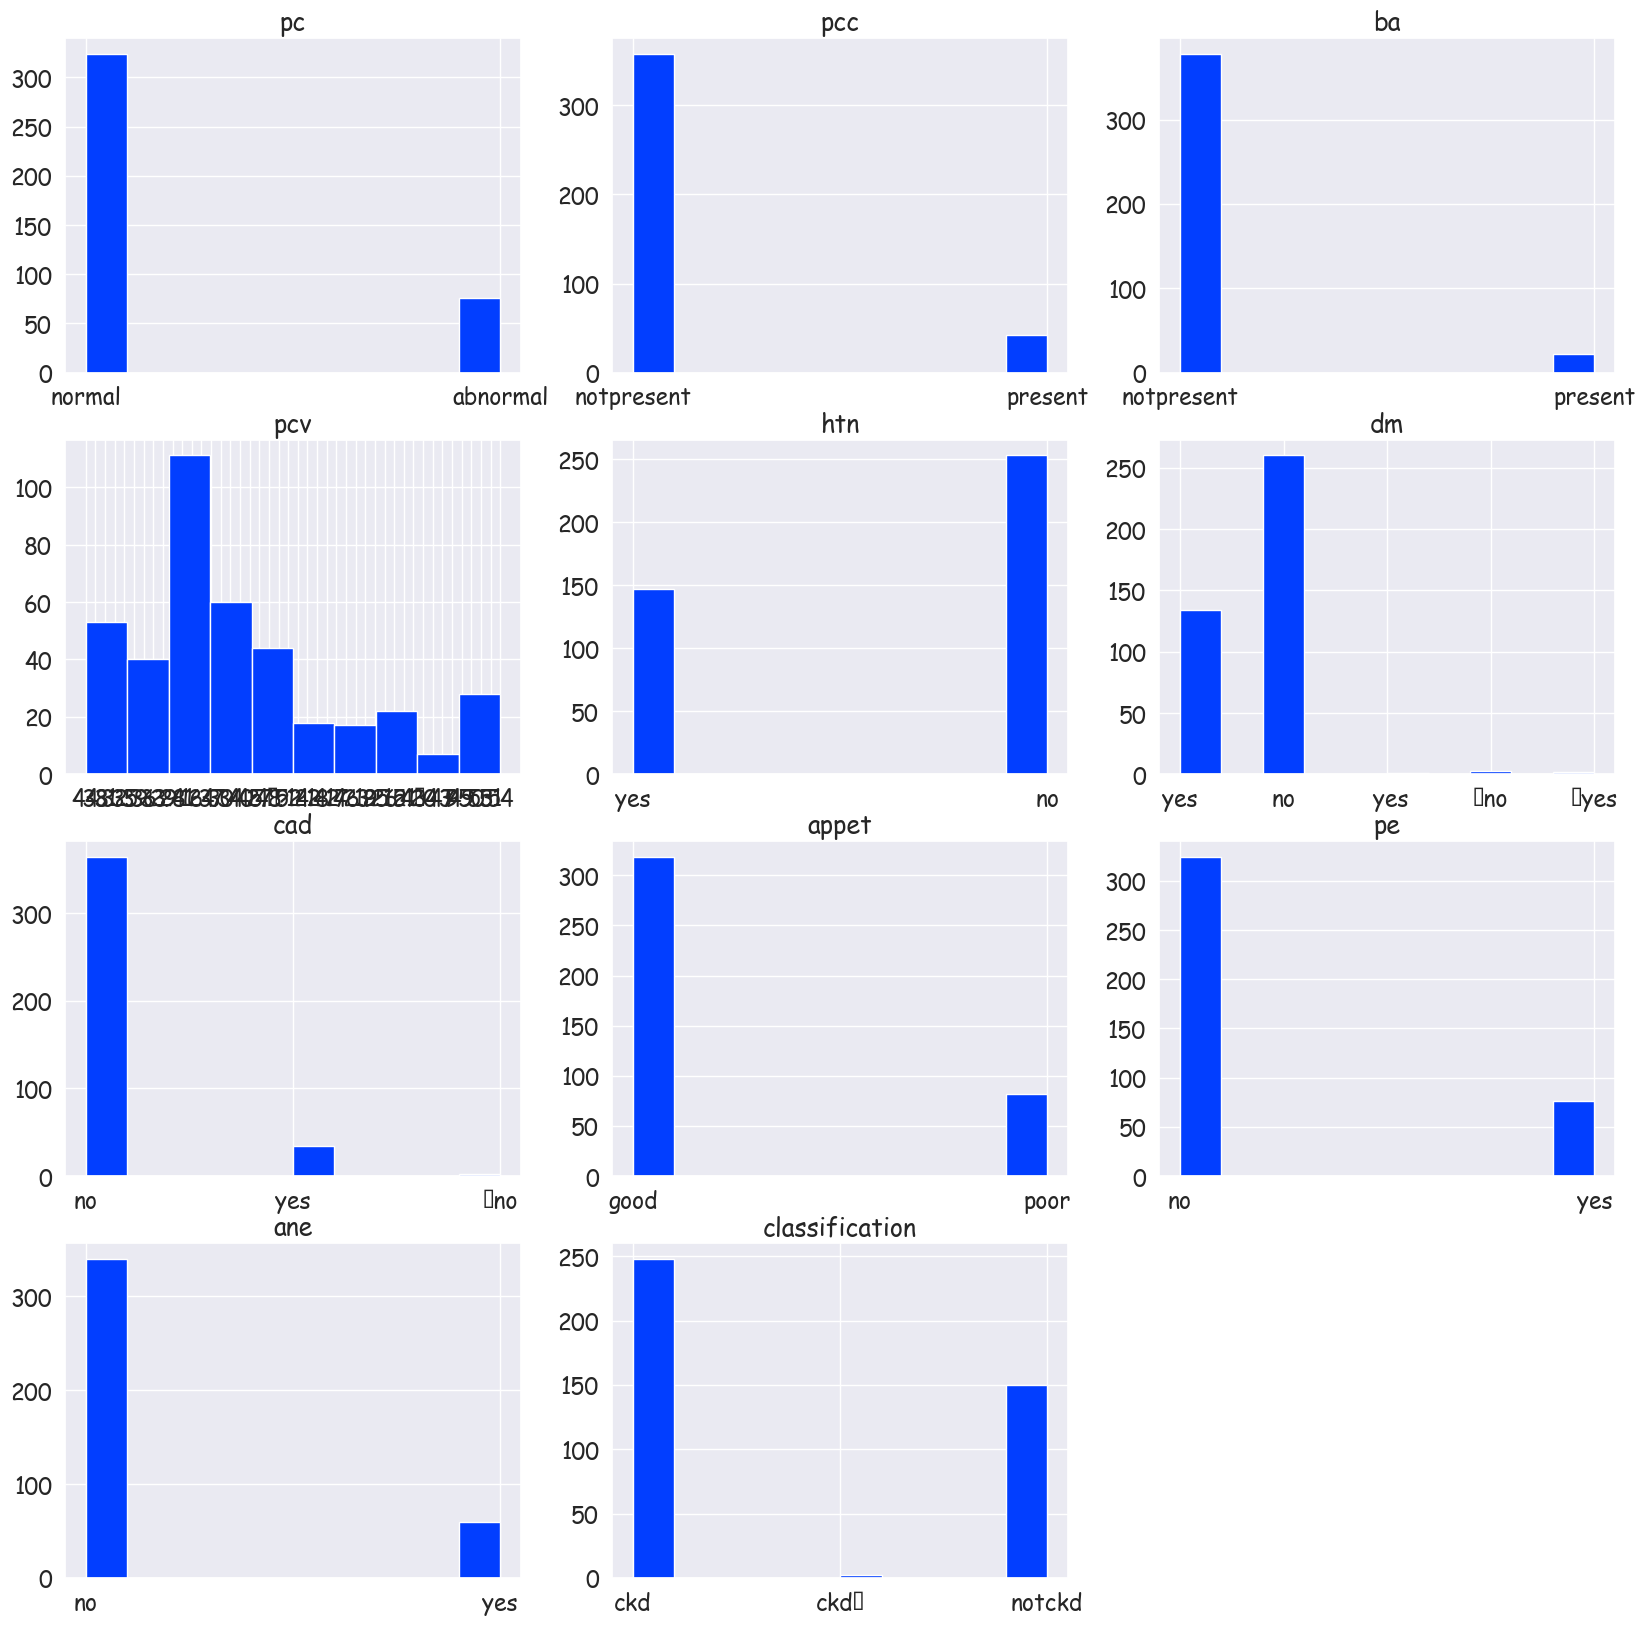

In [62]:
plt.figure(figsize=(20,20),dpi=100)
for i,j in enumerate(obj_list):
    plt.subplot(4,3,i+1)
    plt.hist(kd[j])
    plt.title(j)
    plt.tight_layout

In [63]:
plt.figure(figsize=(20,20),dpi=100)
for i,j in enumerate(obj_list):
    plt.subplot(4,3,i+1)
    plt.box(kd[j])
    plt.title(j)
    plt.tight_layout

Error in callback <function _draw_all_if_interactive at 0x000001A30155DB40> (for post_execute):


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

<Figure size 2000x2000 with 11 Axes>